In [1]:
import pandas as pd

In [2]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("NYPD.csv")

In [27]:
df.sample(10)

,OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1
1029098,1029099,3d47eed0,08/14/2014 09:16:00 PM,Thursday,Aug,14,2014,21,8,14,2014,ROBBERY,FELONY,G,45,BRONX,N.Y. POLICE DEPT,1029659,248649,"(40.84905058, -73.8358689889999)"
1042162,1042163,9d9933ee,10/16/2015 02:10:00 AM,Friday,Oct,16,2015,2,10,16,2015,ROBBERY,FELONY,F,24,MANHATTAN,N.Y. POLICE DEPT,993417,230310,"(40.7988272260001, -73.966892018)"
353096,353097,d6f288c,02/16/2009 10:00:00 PM,Monday,Feb,16,2009,22,2,17,2009,BURGLARY,FELONY,J,60,BROOKLYN,N.Y. POLICE DEPT,987607,152474,"(40.5851895760001, -73.98791539)"
126174,126175,9d9dd80a,10/04/2006 10:30:00 PM,Wednesday,Oct,4,2006,22,10,5,2006,GRAND LARCENY OF MOTOR VEHICLE,FELONY,M,77,BROOKLYN,N.Y. POLICE DEPT,1004952,183648,"(40.670732087, -73.925373414)"
993943,993944,dfe42783,05/12/2014 06:00:00 PM,Monday,May,12,2014,18,5,12,2014,FELONY ASSAULT,FELONY,I,106,QUEENS,N.Y. POLICE DEPT,1038635,185106,"(40.6745911250001, -73.803939073)"
972748,972749,3cf7b509,02/16/2014 07:55:00 AM,Sunday,Feb,16,2014,7,2,16,2014,GRAND LARCENY,FELONY,B,25,MANHATTAN,N.Y. TRANSIT POLICE,1000414,230243,"(40.7986333000001, -73.9416203709999)"
1062857,1062858,cee609f3,07/15/2014 09:00:00 AM,Tuesday,Jul,15,2014,9,8,3,2014,BURGLARY,FELONY,A,111,QUEENS,N.Y. POLICE DEPT,1053492,210367,"(40.743822574, -73.750118855)"
402205,402206,74485ad8,04/17/2010 04:30:00 PM,Saturday,Apr,17,2010,16,4,23,2010,GRAND LARCENY,FELONY,B,7,MANHATTAN,N.Y. POLICE DEPT,986498,199733,"(40.714905618, -73.9918923279999)"
688519,688520,4095960f,08/10/2013 12:00:00 PM,Saturday,Aug,10,2013,12,8,11,2013,GRAND LARCENY,FELONY,I,114,QUEENS,N.Y. POLICE DEPT,1000355,213136,"(40.751679186, -73.941874465)"
749780,749781,956e0ef8,05/14/2012 07:55:00 AM,Monday,May,14,2012,7,5,14,2012,ROBBERY,FELONY,F,90,BROOKLYN,N.Y. POLICE DEPT,999149,196352,"(40.7056133180001, -73.946264379)"


In [50]:
df.describe()

,OBJECTID,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Precinct,XCoordinate,YCoordinate
count,1123291.000000,1123291.000000,1123221.000000,1123222.000000,1123290.000000,1123290.000000,1123290.000000,1123270.000000,1123291.000000,1123291.000000
mean,559424.776396,15.672435,2010.310099,12.799588,6.715652,15.790777,2010.359028,62.972119,1005517.183683,206167.374202
std,324326.307415,8.864165,2.985457,6.776828,3.401206,8.796276,2.906799,34.898368,21563.101465,31376.994511
min,1.000000,1.000000,1905.000000,0.000000,1.000000,1.000000,2006.000000,1.000000,111.000000,111.000000
25%,278541.500000,8.000000,2008.000000,8.000000,4.000000,8.000000,2008.000000,34.000000,991168.000000,185192.000000
50%,559361.000000,16.000000,2010.000000,14.000000,7.000000,16.000000,2010.000000,66.000000,1003688.000000,205082.000000
75%,840350.500000,23.000000,2013.000000,18.000000,10.000000,23.000000,2013.000000,94.000000,1017254.000000,229037.000000
max,1123724.000000,31.000000,2015.000000,23.000000,12.000000,31.000000,2015.000000,123.000000,1067186.000000,7220451.000000


In [8]:
def getlocation(str):
    x = float(str[1:str.find(',')])
    y = float(str[str.find(',')+1:-1])
    return y, x
getlocation(df["Location 1"].values[0])

(-73.9883732929999, 40.6227027620001)

In [10]:
df = df[pd.notnull(df['Offense'])]

Рассмотрим соотношение преступности по районам:

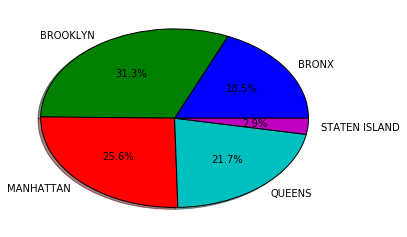

In [11]:
boroughs = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']
sizes = []
for borough in boroughs:
    sizes.append(len(df[df["Borough"] == borough]))
plt.pie(sizes, labels = boroughs, autopct='%1.1f%%', shadow=True)
plt.show()

Проанализируем время совершения каждого из видов преступлений:

In [57]:
offenses = set(df_last["Offense"])
offenses

{'BURGLARY',
 'FELONY ASSAULT',
 'GRAND LARCENY',
 'GRAND LARCENY OF MOTOR VEHICLE',
 'MURDER & NON-NEGL. MANSLAUGHTE',
 'RAPE',
 'ROBBERY'}

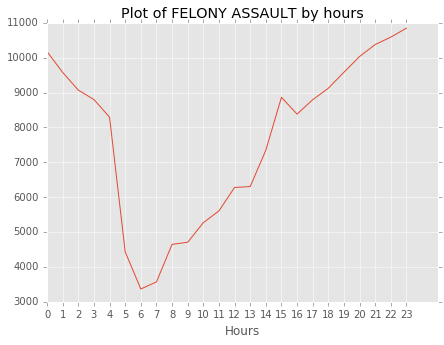

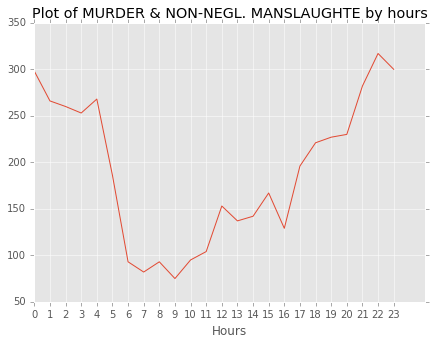

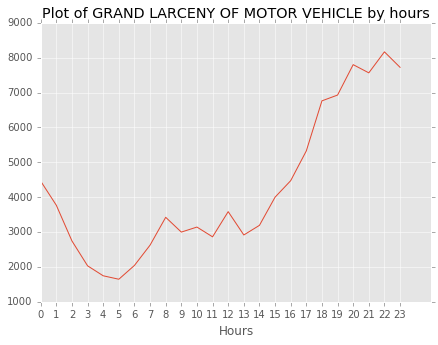

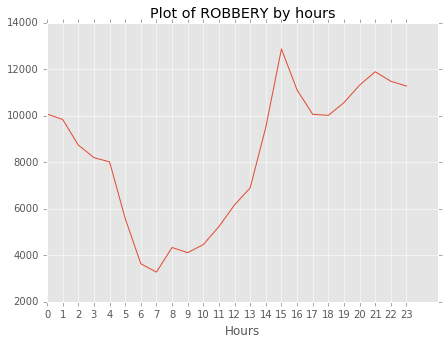

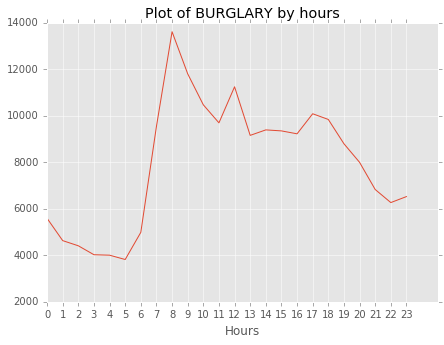

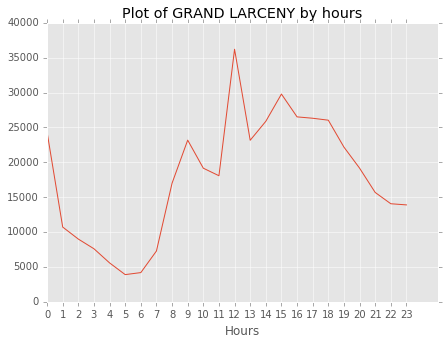

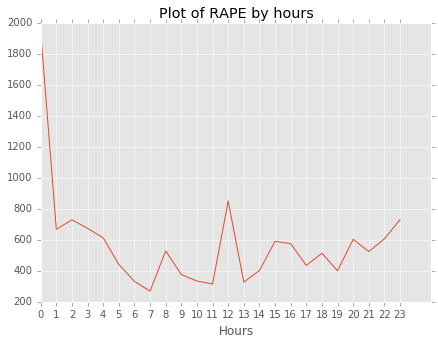

In [52]:
plt.style.use("ggplot")
for of in offenses:
    df1 = df[df["Offense"] == of]
    arr = df1["Occurrence Hour"].values
    sizes = []
    for hour in np.arange(0, 24):
        sizes.append(len(arr[arr == hour]))
    plt.figure(figsize = (7,5))
    plt.plot(sizes)
    plt.title("Plot of "+of+" by hours")
    plt.xlabel("Hours")
    plt.xticks(np.arange(0, 24))
    plt.show()

Видим, что абсолютное большинство преступлений совершаются во второй половине дня и ночью. Выделяются только кражи со взломом, пик которых приходится на утро.

Исследуем преступления, совершенные за последнее время:

In [58]:
df_last = df[df['Occurrence Year'] > 2014]

In [29]:
from matplotlib.patches import Circle
def plot_on_map(df, feature):
    LOW_LEFT_CORNR_LONGITUDE = -74.260380
    LOW_LEFT_CORNER_LATITUDE = 40.485808
    UP_RIGHT_CORNER_LONGITUDE = -73.699206
    UP_RIGHT_CORNER_LATITUDE = 40.917691

    MIN_NYC_ISLAND_TO_VISUALIZ = 0.6

    # Create the Basemap
    plt.figure(figsize = (10, 10))
    m = Basemap(llcrnrlon=LOW_LEFT_CORNR_LONGITUDE,
    llcrnrlat=LOW_LEFT_CORNER_LATITUDE,
    urcrnrlon=UP_RIGHT_CORNER_LONGITUDE,
    urcrnrlat=UP_RIGHT_CORNER_LATITUDE,
    ellps='WGS84',
    resolution='h',
    area_thresh=MIN_NYC_ISLAND_TO_VISUALIZ)

    m.drawcoastlines()
    m.fillcontinents(color='green')
    #m.drawcountries(linewidth=3)

    m.drawmapboundary(fill_color='blue')

    #s = m.readshapefile(shapefile='shape/new_york_administrative', name='segments', color='gray', linewidth=0.5)

    SAMPLE_LONGITUDE = (LOW_LEFT_CORNR_LONGITUDE + UP_RIGHT_CORNER_LONGITUDE) / 2
    SAMPLE_LATITUDE = (LOW_LEFT_CORNER_LATITUDE + UP_RIGHT_CORNER_LATITUDE) / 2

    # plt.legend()
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    df_feature = df[df["Offense"] == feature]
    for str in df_feature["Location 1"].values:
        x, y = getlocation(str)
        x, y = m(x, y)
        m.plot(x, y, 'ro')
    plt.title(feature)
    plt.show()

Нанесем на карту преступления каждого из представленных видов:

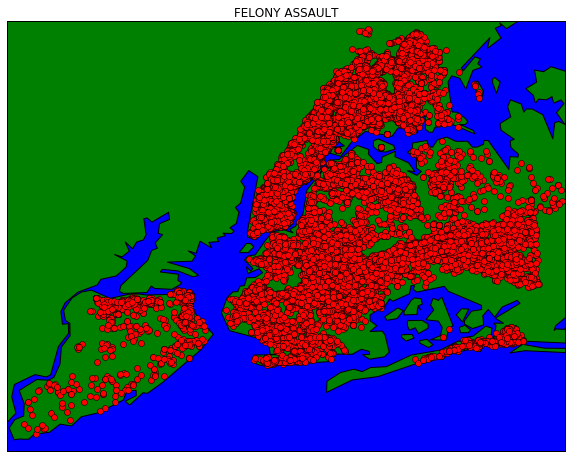

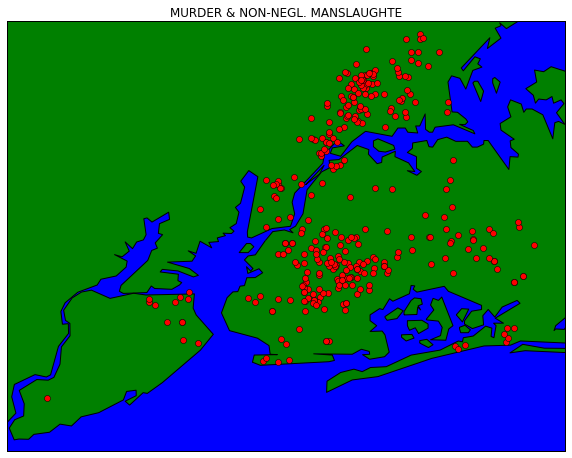

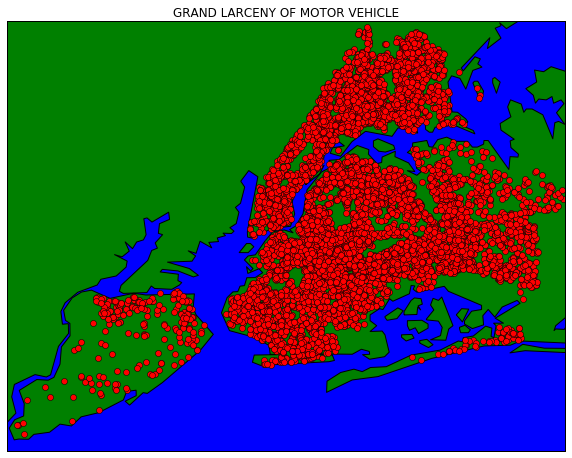

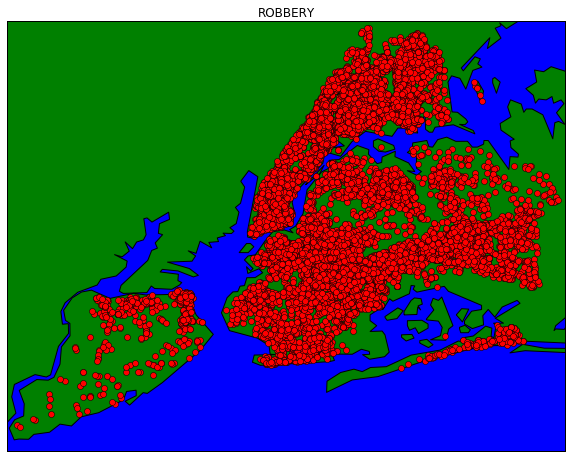

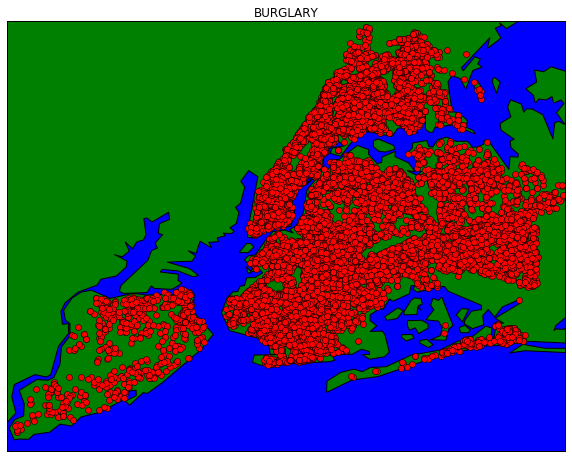

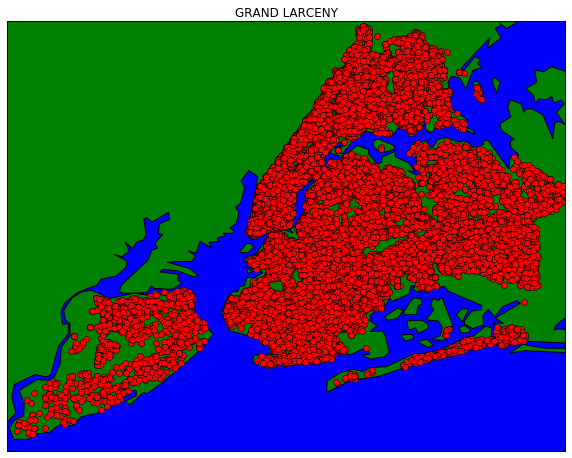

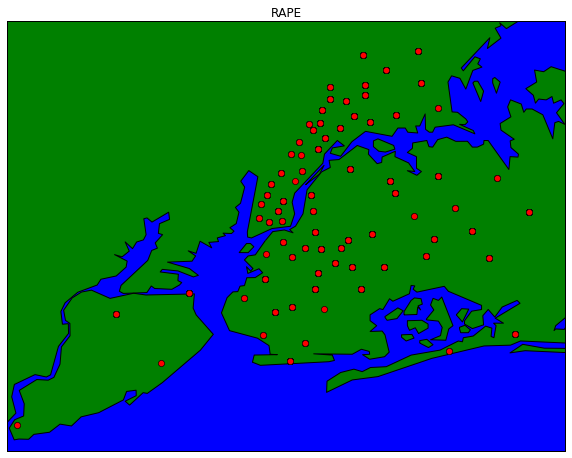

In [30]:
for of in offenses:
    plot_on_map(df_last, of)

Ожидаемо наблюдаем, что более тяжкие преступления совершаются значительно реже остальных

Исследуем зависимость количества преступлений от дня недели и месяца:

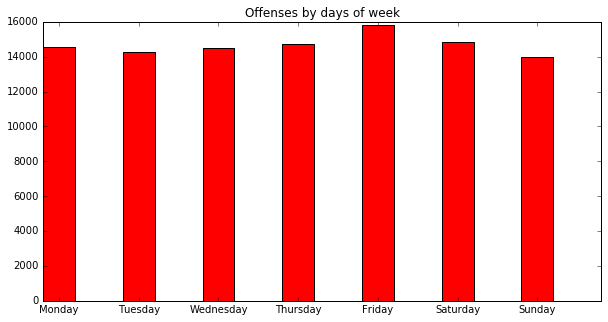

In [26]:
sizes = []
df_last = df_last[pd.notnull(df_last["Day of Week"])]
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in labels:
    sizes.append(len(df_last[df_last["Day of Week"] == day]))
ind = np.arange(len(labels))
width = 0.4
plt.figure(figsize = (10,5))
plt.bar(ind, sizes, width, color = 'r')
plt.title('Offenses by days of week')
plt.xticks(ind + width/2., labels)
plt.show()

Видим, что преступления примерно одинаково совершаются и в будни, и на выходных.

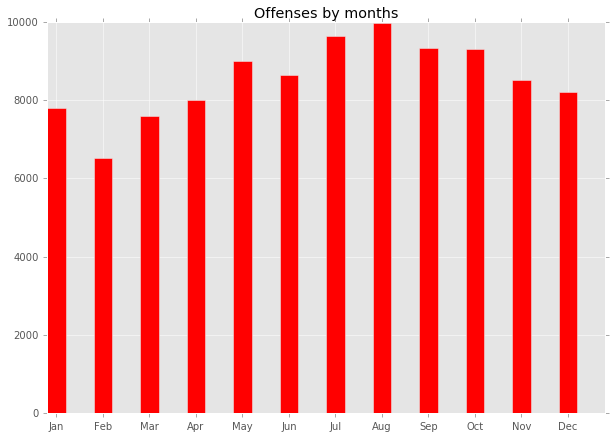

In [56]:
sizes = []
df_last = df_last[pd.notnull(df_last["Occurrence Month"])]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for day in labels:
    sizes.append(len(df_last[df_last["Occurrence Month"] == day]))
ind = np.arange(len(labels))
width = 0.4
plt.figure(figsize = (10,7))
plt.bar(ind, sizes, width, color = 'r')
plt.title('Offenses by months')
plt.xticks(ind + width/2., labels)
plt.show()

А в этом случае наблюдается явный пик, приходящийся на лето